# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

import os.path

file_name = "news_df.pkl"

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\emers\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
#newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])
newsapi=NewsApiClient("c6f0f07acc5c4cf5afe0cb24a21e23bb")

In [3]:
print(os.environ["NEWS_API_KEY"])

1d457d9993074f1a951addafa4c4ae80


In [4]:
print(newsapi)

In [8]:
# Create a newsapi client

current_date = pd.Timestamp(datetime.now() - timedelta(1), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(31), tz="America/New_York").isoformat()

def get_articles(keyword):
    """
    
    """
    export_all_articles = []
    all_dates = []   
    each_article = {}   
    keys = ["title","description","content"]
    
    date = datetime.strptime(current_date[:10], "%Y-%m-%d") # global var (current_date)
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d") # past date... 
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date: # loop through each day
        todays_news = []
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything( # global newsapi....
            q=keyword,
            from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1
        )

        for i in range(0, len(articles["articles"])): # for each article on that day
            todays_news.append({})
            for k in keys:
              todays_news[i][k] = articles["articles"][i][k]
        all_dates.append(date) # 
        export_all_articles.append(todays_news)
        date = date - timedelta(days=1) # increment out day....
    return export_all_articles, all_dates

In [9]:
if not os.path.isfile(file_name): 
    bitcoin_articles, dates = get_articles("bitcoin")
    ethereum_articles, _ = get_articles("ethereum")
    solana_articles, _ = get_articles("solana")

    analyzer = SentimentIntensityAnalyzer()

    bitcoin_df = pd.DataFrame(bitcoin_articles, index=dates)
    ethereum_df = pd.DataFrame(ethereum_articles, index=dates)
    solana_df = pd.DataFrame(solana_articles, index=dates)

    news_df = pd.concat([bitcoin_df, ethereum_df, solana_df], keys=['bitcoin','ethereum','solana'], axis="columns")

    news_df.to_pickle(file_name)

else:
    news_df = pd.read_pickle(file_name)

news_df.head()

Fetching news about 'bitcoin'
******************************
retrieving news from: 2022-06-22 00:00:00
retrieving news from: 2022-06-21 00:00:00
retrieving news from: 2022-06-20 00:00:00
retrieving news from: 2022-06-19 00:00:00
retrieving news from: 2022-06-18 00:00:00
retrieving news from: 2022-06-17 00:00:00
retrieving news from: 2022-06-16 00:00:00
retrieving news from: 2022-06-15 00:00:00
retrieving news from: 2022-06-14 00:00:00
retrieving news from: 2022-06-13 00:00:00
retrieving news from: 2022-06-12 00:00:00
retrieving news from: 2022-06-11 00:00:00
retrieving news from: 2022-06-10 00:00:00
retrieving news from: 2022-06-09 00:00:00
retrieving news from: 2022-06-08 00:00:00
retrieving news from: 2022-06-07 00:00:00
retrieving news from: 2022-06-06 00:00:00
retrieving news from: 2022-06-05 00:00:00
retrieving news from: 2022-06-04 00:00:00
retrieving news from: 2022-06-03 00:00:00
retrieving news from: 2022-06-02 00:00:00
retrieving news from: 2022-06-01 00:00:00
retrieving news

bitcoin  \
                                                           0    
2022-06-22  {'title': 'FTX boss Sam Bankman-Fried has bail...   
2022-06-21  {'title': 'An ETF that will allow investors to...   
2022-06-20  {'title': 'Bitcoin Price Roller-Coasters Over ...   
2022-06-19  {'title': 'Bitcoin recovers, climbs 7.6% to pa...   
2022-06-18  {'title': 'Bitcoin last down 7.4% at $18915 - ...   

                                                               \
                                                           1    
2022-06-22  {'title': 'Some Brits turn to gambling, crypto...   
2022-06-21  {'title': 'BVTV: MicroStrategy and crypto - Re...   
2022-06-20  {'title': 'First Short Bitcoin ETF To List On ...   
2022-06-19  {'title': 'Dogecoin spikes after Elon Musk say...   
2022-06-18  {'title': 'Bitcoin drops 6.5% to below $20000 ...   

                                                               \
                                                           2    
2022-06-22  {'title': 'Crypto platform FalconX valued at $...   
2022-06-21  {'title': 'Cryptocurrency tech is vulnerable t...   
2022-06-20  {'title': 'Not quite "Together" - Reuters', 'd...   
2022-06-19  {'title': 'Crypto billionaire says Fed is driv...   
2022-06-18  {'title': 'Bitcoin value slumps below $20,000 ...   

                                                               \
                                                           3    
2022-06-22  {'title': 'Crypto giant Tether to launch sterl...   
2022-06-21  {'title': 'CFTC advocates for expansion of cry...   
2022-06-20  {'title': 'Crypto industry gripped by anxiety ...   
2022-06-19  {'title': 'Since bitcoin hit an all-time high ...   
2022-06-18  {'title': 'Bitcoin Drops Below $20,000 as Cryp...   

                                                               \
                                                           4    
2022-06-22  {'title': 'Outside the Box: What Ben Bernanke ...   
2022-06-21  {'title': 'Brazil's Ebanx lays off 20% of empl...   
2022-06-20  {'title': 'Crypto lender Babel Finance wins de...   
2022-06-19  {'title': 'Bitcoin's Ferocious Selloff Pauses ...   
2022-06-18  {'title': 'Crypto panic as digital assets foll...   

                                                               \
                                                           5    
2022-06-22  {'title': 'Crypto: Tough times in the bitcoin ...   
2022-06-21  {'title': 'Crypto firm BlockFi signs $250 mln ...   
2022-06-20  {'title': 'How to Hire a Hitman review – proof...   
2022-06-19  {'title': 'Elon Musk Hints Twitter Will Integr...   
2022-06-18  {'title': 'Bitcoin Drops Below $20,000 as Cryp...   

                                                               \
                                                           6    
2022-06-22  {'title': 'Yen bruised as Japan's rates gap wi...   
2022-06-21  {'title': 'Crypto fears now materialising, cen...   
2022-06-20  {'title': 'Global recession fears loom over ma...   
2022-06-19  {'title': '‘I Am’ Buying—Elon Musk Reveals Sur...   
2022-06-18  {'title': 'Bitcoin drops below $20k, Ether cra...   

                                                               \
                                                           7    
2022-06-22  {'title': 'Asian stocks stumble as Wall St opt...   
2022-06-21  {'title': 'South Korea puts crypto company Ter...   
2022-06-20  {'title': 'Yen fragile near 24-year low in BOJ...   
2022-06-19  {'title': 'Bitcoin drops below $20,000', 'desc...   
2022-06-18  {'title': 'Crypto: Bitcoin slumps below $20,00...   

                                                               \
                                                           8    
2022-06-22  {'title': 'Binance.US plans to eliminate fees ...   
2022-06-21  {'title': 'Dow climbs 425 points as investors ...   
2022-06-20  {'title': 'Is Solana the Next Bitcoin?', 'desc...   
2022-06-19  {'title': 'Bitcoin price falls below $20000 fo...   
2022-06-18  {'ti

In [10]:
# Reading in bitcoin_articles and creating dataframe from the get_articles dictionary

bitcoin_df = pd.DataFrame()

for i in range(len(bitcoin_articles)):
  title=[]
  desc = []
  cont = []

  for a in range(len(bitcoin_articles[i])):
    #print(bitcoin_articles[i])
    title.append(bitcoin_articles[i][a]["title"])
    desc.append(bitcoin_articles[i][a]["description"])
    cont.append(bitcoin_articles[i][a]["content"])
  df = pd.DataFrame(
    {
      "title":[title],
      "description":[desc],
      "content": [cont]
    }
  )
  bitcoin_df = pd.concat([bitcoin_df, df])
  bitcoin_df.head()
  #all_df.index = dates


In [11]:
# Setting the date

bitcoin_df["dates"]= dates
bitcoin_df.set_index("dates", inplace=True)

In [12]:
# Checking the dataframe

bitcoin_df.head()

,title,description,content
dates,,,
2022-06-22,[FTX boss Sam Bankman-Fried has bailed out str...,"[SBF ""is the new John Pierpoint Morgan - he is...",[FTX's Sam Bankman-Fried has provided a $250 m...
2022-06-21,[An ETF that will allow investors to bet again...,[The ETF launch comes after bitcoin briefly di...,[Investors now have a convenient way to bet ag...
2022-06-20,[Bitcoin Price Roller-Coasters Over and Below ...,"[The crypto sell-off continues., An anonymous ...",[Bitcoin clawed its way back from a weekend lo...
2022-06-19,"[Bitcoin recovers, climbs 7.6% to pass $20400 ...","[Bitcoin on Sunday rose around 7.6% to $20,404...",[June 19 (Reuters) - Bitcoin on Sunday rose ar...
2022-06-18,"[Bitcoin last down 7.4% at $18915 - Reuters, B...","[Bitcoin dropped 7.46% to $18,915.29 at 15:59 ...",[June 18 (Reuters) - Bitcoin dropped 7.46% to ...


In [13]:
# Pickling the dataframe

bitcoin_df.to_pickle("bitcoin.pkl")

In [14]:
# Reading in ethereum_articles and creating dataframe from the get_articles dictionary

ethereum_df = pd.DataFrame()

for i in range(len(ethereum_articles)):
  title=[]
  desc = []
  cont = []

  for a in range(len(ethereum_articles[i])):
    #print(bitcoin_articles[i])
    title.append(ethereum_articles[i][a]["title"])
    desc.append(ethereum_articles[i][a]["description"])
    cont.append(ethereum_articles[i][a]["content"])
  df = pd.DataFrame(
    {
      "title":[title],
      "description":[desc],
      "content": [cont]
    }
  )
  ethereum_df = pd.concat([ethereum_df, df])
  ethereum_df.head()

In [15]:
# Setting the date index

ethereum_df["dates"]= dates
ethereum_df.set_index("dates", inplace=True)

In [16]:
# Checking the dataframe

ethereum_df.head()

,title,description,content
dates,,,
2022-06-22,[eBay now has an established NFT marketplace a...,[eBay started allowing sales of NFTs last year...,[Image: eBay\r\n\n \n\n eBay made its biggest ...
2022-06-21,[US-Based Athletes Who Suffered The Biggest Lo...,"[Trading in your USD salary for Bitcoin, Ether...",[It might have been trendy to turn your base s...
2022-06-20,[Crypto lender Babel Finance wins debt repayme...,"[Babel Finance, the Hong Kong-based crypto len...","[June 20 (Reuters) - Babel Finance, the Hong K..."
2022-06-19,[Dogecoin spikes after Elon Musk says he'll ke...,"[The coin, heavily championed by the Tesla fou...",[Dogecoin jumped nearly 10% off near-record lo...
2022-06-18,[Ethereum Mining No Longer Profitable For Many...,"[For the first time since 2020, Ethereum minin...","[The price of Ethereum has dropped below $1,25..."


In [17]:
# Pickling the dataframe

ethereum_df.to_pickle("ethereum.pkl")

In [18]:
# Reading in solana_articles and creating dataframe from the get_articles dictionary

solana_df = pd.DataFrame()

for i in range(len(solana_articles)):
  title=[]
  desc = []
  cont = []

  for a in range(len(solana_articles[i])):
    #print(bitcoin_articles[i])
    title.append(solana_articles[i][a]["title"])
    desc.append(solana_articles[i][a]["description"])
    cont.append(solana_articles[i][a]["content"])
  df = pd.DataFrame(
    {
      "title":[title],
      "description":[desc],
      "content": [cont]
    }
  )
  solana_df = pd.concat([solana_df, df])
  solana_df.head()

In [19]:
# Settig the date index

solana_df["dates"]= dates
solana_df.set_index("dates", inplace=True)

In [20]:
# Checking the dataframe

solana_df.head()

,title,description,content
dates,,,
2022-06-22,[Crypto Crash 2022: 3 Cryptocurrencies to Buy ...,"[As prices plunge, now could be a smart time t...","[Stock market downturns can be intimidating, e..."
2022-06-21,[Solana-based NFT marketplace Magic Eden annou...,[Yogita Khatri / The Block:\nSolana-based NFT ...,[The New Consumer— by Dan Frommer\r\nA publica...
2022-06-20,"[Is Solana the Next Bitcoin?, Solend Labs, a ""...","[Solana's price is sinking, but could it soar ...",[The stock market has officially entered bear ...
2022-06-19,[Solana just seized $170MM of user funds to pr...,[There is a large liquidation watch on Solana'...,[There is a large liquidation watch on Solana'...
2022-06-18,[Shark Tank's Kevin O'Leary explains why he's ...,"[In an exclusive interview with Insider, O'Lea...","[""Shark Tank"" investor Kevin O'Leary otherwise..."


In [21]:
# Creating a pickle file
solana_df.to_pickle("solana.pkl")

In [22]:
# Fetch the Bitcoin news articles
bitcoin_df = pd.read_pickle("bitcoin.pkl")
bitcoin_df.head()

,title,description,content
dates,,,
2022-06-22,[FTX boss Sam Bankman-Fried has bailed out str...,"[SBF ""is the new John Pierpoint Morgan - he is...",[FTX's Sam Bankman-Fried has provided a $250 m...
2022-06-21,[An ETF that will allow investors to bet again...,[The ETF launch comes after bitcoin briefly di...,[Investors now have a convenient way to bet ag...
2022-06-20,[Bitcoin Price Roller-Coasters Over and Below ...,"[The crypto sell-off continues., An anonymous ...",[Bitcoin clawed its way back from a weekend lo...
2022-06-19,"[Bitcoin recovers, climbs 7.6% to pass $20400 ...","[Bitcoin on Sunday rose around 7.6% to $20,404...",[June 19 (Reuters) - Bitcoin on Sunday rose ar...
2022-06-18,"[Bitcoin last down 7.4% at $18915 - Reuters, B...","[Bitcoin dropped 7.46% to $18,915.29 at 15:59 ...",[June 18 (Reuters) - Bitcoin dropped 7.46% to ...


In [23]:
# Reassign the values of each row's list into strings
bitcoin_df = bitcoin_df.assign(
  title = lambda x: x["title"].str.join(""),
  description = lambda x: x["description"].str.join(""),
  content = lambda x: x["content"].str.join("")
)

In [24]:
# Fetch the Ethereum news articles
ethereum_df = pd.read_pickle("ethereum.pkl")
ethereum_df.head()

,title,description,content
dates,,,
2022-06-22,[eBay now has an established NFT marketplace a...,[eBay started allowing sales of NFTs last year...,[Image: eBay\r\n\n \n\n eBay made its biggest ...
2022-06-21,[US-Based Athletes Who Suffered The Biggest Lo...,"[Trading in your USD salary for Bitcoin, Ether...",[It might have been trendy to turn your base s...
2022-06-20,[Crypto lender Babel Finance wins debt repayme...,"[Babel Finance, the Hong Kong-based crypto len...","[June 20 (Reuters) - Babel Finance, the Hong K..."
2022-06-19,[Dogecoin spikes after Elon Musk says he'll ke...,"[The coin, heavily championed by the Tesla fou...",[Dogecoin jumped nearly 10% off near-record lo...
2022-06-18,[Ethereum Mining No Longer Profitable For Many...,"[For the first time since 2020, Ethereum minin...","[The price of Ethereum has dropped below $1,25..."


In [25]:
# Reassign the values of each row's list into strings
ethereum_df = ethereum_df.assign(
  title = lambda x: ethereum_df["title"].str.join(""),
  description = lambda x: ethereum_df["description"].str.join(""),
  content = lambda x: ethereum_df["content"].str.join("")
)

In [26]:
# Fetch the Solana news articles
solana_df = pd.read_pickle("solana.pkl")
solana_df.head()

,title,description,content
dates,,,
2022-06-22,[Crypto Crash 2022: 3 Cryptocurrencies to Buy ...,"[As prices plunge, now could be a smart time t...","[Stock market downturns can be intimidating, e..."
2022-06-21,[Solana-based NFT marketplace Magic Eden annou...,[Yogita Khatri / The Block:\nSolana-based NFT ...,[The New Consumer— by Dan Frommer\r\nA publica...
2022-06-20,"[Is Solana the Next Bitcoin?, Solend Labs, a ""...","[Solana's price is sinking, but could it soar ...",[The stock market has officially entered bear ...
2022-06-19,[Solana just seized $170MM of user funds to pr...,[There is a large liquidation watch on Solana'...,[There is a large liquidation watch on Solana'...
2022-06-18,[Shark Tank's Kevin O'Leary explains why he's ...,"[In an exclusive interview with Insider, O'Lea...","[""Shark Tank"" investor Kevin O'Leary otherwise..."


In [27]:
# Reassign the values of each row's list into strings
solana_df = solana_df.assign(
  title = lambda x: solana_df["title"].str.join(""),
  description = lambda x: solana_df["description"].str.join(""),
  content = lambda x: solana_df["content"].str.join("")
)

In [28]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\emers\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [30]:
# Setting dictionaries for the for-loops

title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
description_sent = {
    "description_compound": [],
    "description_pos": [],
    "description_neu": [],
    "description_neg": [],
    "description_sent": [],
}
content_sent = {
    "content_compound": [],
    "content_pos": [],
    "content_neu": [],
    "content_neg": [],
    "content_sent": [],
}

In [31]:
# Create the Bitcoin sentiment scores DataFrames
# Get sentiment for the text and the title
for index, row in bitcoin_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        description_sentiment = analyzer.polarity_scores(row["description"])
        description_sent["description_compound"].append(description_sentiment["compound"])
        description_sent["description_pos"].append(description_sentiment["pos"])
        description_sent["description_neu"].append(description_sentiment["neu"])
        description_sent["description_neg"].append(description_sentiment["neg"])
        description_sent["description_sent"].append(get_sentiment(description_sentiment["compound"]))

        content_sentiment = analyzer.polarity_scores(row["content"])
        content_sent["content_compound"].append(content_sentiment["compound"])
        content_sent["content_pos"].append(content_sentiment["pos"])
        content_sent["content_neu"].append(content_sentiment["neu"])
        content_sent["content_neg"].append(content_sentiment["neg"])
        content_sent["content_sent"].append(get_sentiment(content_sentiment["compound"]))
    except AttributeError:
        pass

In [32]:
# Creating and setting the bitcoin_title_sentiment_df DataFrame
bitcoin_title_sentiment_df = pd.DataFrame(title_sent)
bitcoin_title_sentiment_df["dates"]= dates
bitcoin_title_sentiment_df.set_index("dates", inplace=True)
bitcoin_title_sentiment_df.head()

,title_compound,title_pos,title_neu,title_neg,title_sent
dates,,,,,
2022-06-22,-0.4621,0.077,0.848,0.074,-1
2022-06-21,0.4029,0.073,0.860,0.067,1
2022-06-20,-0.9648,0.070,0.843,0.087,-1
2022-06-19,-0.9895,0.058,0.856,0.085,-1
2022-06-18,-0.9764,0.040,0.897,0.063,-1


In [55]:
# Creating and formatting bitcoin_description_sentiment_df
bitcoin_description_sentiment_df = pd.DataFrame.from_dict(description_sent, orient="index")
bitcoin_description_sentiment_df = bitcoin_description_sentiment_df.transpose()
bitcoin_description_sentiment_df["dates"]= pd.Series(dates)
bitcoin_description_sentiment_df.set_index("dates", inplace=True)
bitcoin_description_sentiment_df.head()

,description_compound,description_pos,description_neu,description_neg,description_sent
dates,,,,,
2022-06-22,0.9675,0.099,0.821,0.080,1.0
2022-06-21,0.9098,0.053,0.908,0.038,1.0
2022-06-20,0.9946,0.092,0.839,0.069,1.0
2022-06-19,-0.7906,0.059,0.879,0.062,-1.0
2022-06-18,-0.5616,0.063,0.868,0.069,-1.0


In [34]:
# Checking the array length of each dictionary due to error message while creating dataframes

print(sum([len(title_sent[x]) for x in title_sent if isinstance(title_sent[x], list)]))
print(sum([len(description_sent[x]) for x in description_sent if isinstance(description_sent[x], list)]))
print(sum([len(content_sent[x]) for x in content_sent if isinstance(content_sent[x], list)]))

150
135
135


In [54]:
# Creating and formatting bitcoin_content_sentiment_df 
bitcoin_content_sentiment_df = pd.DataFrame(content_sent)
bitcoin_content_sentiment_df["dates"]= pd.Series(dates)
bitcoin_content_sentiment_df.set_index("dates", inplace=True)
bitcoin_content_sentiment_df.head()

,content_compound,content_pos,content_neu,content_neg,content_sent
dates,,,,,
2022-06-22,0.9964,0.085,0.872,0.043,1
2022-06-21,0.9993,0.102,0.858,0.040,1
2022-06-20,0.9983,0.089,0.864,0.047,1
2022-06-19,0.9318,0.053,0.913,0.034,1
2022-06-18,-0.4392,0.058,0.889,0.053,-1


In [56]:
# Joining all dataframes
bitcoin_df = bitcoin_df.join(bitcoin_title_sentiment_df).join(bitcoin_description_sentiment_df).join(bitcoin_content_sentiment_df)
bitcoin_df.head()

,title,description,content,title_compound,title_pos,title_neu,title_neg,title_sent,description_compound,description_pos,description_neu,description_neg,description_sent,content_compound,content_pos,content_neu,content_neg,content_sent
dates,,,,,,,,,,,,,,,,,,
2022-06-22,FTX boss Sam Bankman-Fried has bailed out stru...,"SBF ""is the new John Pierpoint Morgan - he is ...",FTX's Sam Bankman-Fried has provided a $250 mi...,-0.4621,0.077,0.848,0.074,-1,0.9675,0.099,0.821,0.080,1.0,0.9964,0.085,0.872,0.043,1.0
2022-06-21,An ETF that will allow investors to bet agains...,The ETF launch comes after bitcoin briefly dip...,Investors now have a convenient way to bet aga...,0.4029,0.073,0.860,0.067,1,0.9098,0.053,0.908,0.038,1.0,0.9993,0.102,0.858,0.040,1.0
2022-06-20,Bitcoin Price Roller-Coasters Over and Below $...,The crypto sell-off continues.An anonymous rea...,Bitcoin clawed its way back from a weekend low...,-0.9648,0.070,0.843,0.087,-1,0.9946,0.092,0.839,0.069,1.0,0.9983,0.089,0.864,0.047,1.0
2022-06-19,"Bitcoin recovers, climbs 7.6% to pass $20400 -...","Bitcoin on Sunday rose around 7.6% to $20,404 ...",June 19 (Reuters) - Bitcoin on Sunday rose aro...,-0.9895,0.058,0.856,0.085,-1,-0.7906,0.059,0.879,0.062,-1.0,0.9318,0.053,0.913,0.034,1.0
2022-06-18,Bitcoin last down 7.4% at $18915 - ReutersBitc...,"Bitcoin dropped 7.46% to $18,915.29 at 15:59 G...",June 18 (Reuters) - Bitcoin dropped 7.46% to $...,-0.9764,0.040,0.897,0.063,-1,-0.5616,0.063,0.868,0.069,-1.0,-0.4392,0.058,0.889,0.053,-1.0


In [69]:
# Setting dictionaries for the for-loops

title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
description_sent = {
    "description_compound": [],
    "description_pos": [],
    "description_neu": [],
    "description_neg": [],
    "description_sent": [],
}
content_sent = {
    "content_compound": [],
    "content_pos": [],
    "content_neu": [],
    "content_neg": [],
    "content_sent": [],
}

In [70]:
# Create the Ethereum sentiment scores DataFrame
# Get sentiment for the text and the title
for index, row in ethereum_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        description_sentiment = analyzer.polarity_scores(row["description"])
        description_sent["description_compound"].append(description_sentiment["compound"])
        description_sent["description_pos"].append(description_sentiment["pos"])
        description_sent["description_neu"].append(description_sentiment["neu"])
        description_sent["description_neg"].append(description_sentiment["neg"])
        description_sent["description_sent"].append(get_sentiment(description_sentiment["compound"]))

        content_sentiment = analyzer.polarity_scores(row["content"])
        content_sent["content_compound"].append(content_sentiment["compound"])
        content_sent["content_pos"].append(content_sentiment["pos"])
        content_sent["content_neu"].append(content_sentiment["neu"])
        content_sent["content_neg"].append(content_sentiment["neg"])
        content_sent["content_sent"].append(get_sentiment(content_sentiment["compound"]))
    except AttributeError:
        pass

In [71]:
# Creating and setting the ethereum_title_sentiment_df DataFrame
ethereum_title_sentiment_df = pd.DataFrame(title_sent)
ethereum_title_sentiment_df["dates"]= dates
ethereum_title_sentiment_df.set_index("dates", inplace=True)
ethereum_title_sentiment_df.head()

,title_compound,title_pos,title_neu,title_neg,title_sent
dates,,,,,
2022-06-22,-0.4784,0.038,0.916,0.045,-1
2022-06-21,0.9880,0.093,0.856,0.051,1
2022-06-20,-0.9395,0.083,0.824,0.092,-1
2022-06-19,-0.9147,0.030,0.918,0.052,-1
2022-06-18,-0.9973,0.048,0.835,0.117,-1


In [72]:
# Creating and formatting ethereum_description_sentiment_df
ethereum_description_sentiment_df = pd.DataFrame.from_dict(description_sent, orient='index')
ethereum_description_sentiment_df = ethereum_description_sentiment_df.transpose()
ethereum_description_sentiment_df["dates"]= pd.Series(dates)
ethereum_description_sentiment_df.set_index("dates", inplace=True)
ethereum_description_sentiment_df.head()

,description_compound,description_pos,description_neu,description_neg,description_sent
dates,,,,,
2022-06-22,0.9994,0.096,0.867,0.038,1.0
2022-06-21,0.9997,0.122,0.824,0.054,1.0
2022-06-20,0.9991,0.109,0.829,0.062,1.0
2022-06-19,0.9979,0.104,0.822,0.074,1.0
2022-06-18,0.9956,0.093,0.837,0.070,1.0


In [73]:
# Creating and formatting ethereum_content_sentiment_df 
ethereum_content_sentiment_df = pd.DataFrame(content_sent)
ethereum_content_sentiment_df["dates"]= pd.Series(dates)
ethereum_content_sentiment_df.set_index("dates", inplace=True)
ethereum_content_sentiment_df.head()

,content_compound,content_pos,content_neu,content_neg,content_sent
dates,,,,,
2022-06-22,0.9992,0.088,0.868,0.044,1
2022-06-21,0.9996,0.114,0.831,0.056,1
2022-06-20,0.9995,0.104,0.843,0.053,1
2022-06-19,0.9982,0.097,0.835,0.068,1
2022-06-18,0.9989,0.102,0.835,0.062,1


In [78]:
# Joining all dataframes
ethereum_df = ethereum_df.join(ethereum_title_sentiment_df, on="dates", how="left", lsuffix="_left", rsuffix="_right").join(ethereum_description_sentiment_df, on="dates", how="left", lsuffix="_left", rsuffix="_right").join(ethereum_content_sentiment_df, on="dates", how="left", lsuffix="_left", rsuffix="_right")
ethereum_df.head()

,title,description,content,title_compound_left,title_pos_left,title_neu_left,title_neg_left,title_sent_left,description_compound_left,description_pos_left,...,description_compound_right,description_pos_right,description_neu_right,description_neg_right,description_sent_right,content_compound_right,content_pos_right,content_neu_right,content_neg_right,content_sent_right
dates,,,,,,,,,,,,,,,,,,,,,
2022-06-22,eBay now has an established NFT marketplace at...,"eBay started allowing sales of NFTs last year,...",Image: eBay\r\n\n \n\n eBay made its biggest m...,-0.4784,0.038,0.916,0.045,-1,0.9994,0.096,...,0.9994,0.096,0.867,0.038,1.0,0.9992,0.088,0.868,0.044,1.0
2022-06-21,US-Based Athletes Who Suffered The Biggest Los...,"Trading in your USD salary for Bitcoin, Ethere...",It might have been trendy to turn your base sa...,0.9880,0.093,0.856,0.051,1,0.9997,0.122,...,0.9997,0.122,0.824,0.054,1.0,0.9996,0.114,0.831,0.056,1.0
2022-06-20,Crypto lender Babel Finance wins debt repaymen...,"Babel Finance, the Hong Kong-based crypto lend...","June 20 (Reuters) - Babel Finance, the Hong Ko...",-0.9395,0.083,0.824,0.092,-1,0.9991,0.109,...,0.9991,0.109,0.829,0.062,1.0,0.9995,0.104,0.843,0.053,1.0
2022-06-19,Dogecoin spikes after Elon Musk says he'll kee...,NaN,Dogecoin jumped nearly 10% off near-record low...,-0.9147,0.030,0.918,0.052,-1,0.9979,0.104,...,0.9979,0.104,0.822,0.074,1.0,0.9982,0.097,0.835,0.068,1.0
2022-06-18,Ethereum Mining No Longer Profitable For Many ...,"For the first time since 2020, Ethereum mining...","The price of Ethereum has dropped below $1,250...",-0.9973,0.048,0.835,0.117,-1,0.9956,0.093,...,0.9956,0.093,0.837,0.070,1.0,0.9989,0.102,0.835,0.062,1.0


In [79]:
# Setting dictionaries for the for-loops

title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
description_sent = {
    "description_compound": [],
    "description_pos": [],
    "description_neu": [],
    "description_neg": [],
    "description_sent": [],
}
content_sent = {
    "content_compound": [],
    "content_pos": [],
    "content_neu": [],
    "content_neg": [],
    "content_sent": [],
}

In [80]:
# Create the Solana sentiment scores DataFrame
# Get sentiment for the text and the title
for index, row in solana_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        description_sentiment = analyzer.polarity_scores(row["description"])
        description_sent["description_compound"].append(description_sentiment["compound"])
        description_sent["description_pos"].append(description_sentiment["pos"])
        description_sent["description_neu"].append(description_sentiment["neu"])
        description_sent["description_neg"].append(description_sentiment["neg"])
        description_sent["description_sent"].append(get_sentiment(description_sentiment["compound"]))

        content_sentiment = analyzer.polarity_scores(row["content"])
        content_sent["content_compound"].append(content_sentiment["compound"])
        content_sent["content_pos"].append(content_sentiment["pos"])
        content_sent["content_neu"].append(content_sentiment["neu"])
        content_sent["content_neg"].append(content_sentiment["neg"])
        content_sent["content_sent"].append(get_sentiment(content_sentiment["compound"]))
    except AttributeError:
        pass

In [81]:
# Creating and setting the solana_title_sentiment_df DataFrame
solana_title_sentiment_df = pd.DataFrame(title_sent)
solana_title_sentiment_df["dates"]= pd.Series(dates)
solana_title_sentiment_df.set_index("dates", inplace=True)
solana_title_sentiment_df.head()

,title_compound,title_pos,title_neu,title_neg,title_sent
dates,,,,,
2022-06-22,-0.2885,0.079,0.843,0.078,-1
2022-06-21,-0.8727,0.042,0.902,0.056,-1
2022-06-20,-0.9780,0.059,0.853,0.088,-1
2022-06-19,0.4749,0.071,0.871,0.059,1
2022-06-18,-0.9186,0.041,0.831,0.127,-1


In [82]:
# Creating and formatting solana_description_sentiment_df
solana_description_sentiment_df = pd.DataFrame.from_dict(description_sent, orient="index")
solana_description_sentiment_df = solana_description_sentiment_df.transpose()
solana_description_sentiment_df["dates"]= pd.Series(dates)
solana_description_sentiment_df.set_index("dates", inplace=True)
solana_description_sentiment_df.head()

,description_compound,description_pos,description_neu,description_neg,description_sent
dates,,,,,
2022-06-22,0.9675,0.099,0.821,0.080,1.0
2022-06-21,0.9098,0.053,0.908,0.038,1.0
2022-06-20,0.9946,0.092,0.839,0.069,1.0
2022-06-19,-0.7906,0.059,0.879,0.062,-1.0
2022-06-18,-0.5616,0.063,0.868,0.069,-1.0


In [83]:
# Creating and formatting solana_content_sentiment_df 
solana_content_sentiment_df = pd.DataFrame(content_sent)
solana_content_sentiment_df["dates"]= pd.Series(dates)
solana_content_sentiment_df.set_index("dates", inplace=True)
solana_content_sentiment_df.head()

,content_compound,content_pos,content_neu,content_neg,content_sent
dates,,,,,
2022-06-22,0.9964,0.085,0.872,0.043,1
2022-06-21,0.9993,0.102,0.858,0.040,1
2022-06-20,0.9983,0.089,0.864,0.047,1
2022-06-19,0.9318,0.053,0.913,0.034,1
2022-06-18,-0.4392,0.058,0.889,0.053,-1


In [85]:
# Joining all dataframes
solana_df = solana_df.join(solana_title_sentiment_df, on="dates", how="left", lsuffix="_left", rsuffix="_right").join(solana_description_sentiment_df, on="dates", how="left", lsuffix="_left", rsuffix="_right").join(solana_content_sentiment_df, on="dates", how="left", lsuffix="_left", rsuffix="_right")
solana_df.head()

,title,description,content,title_compound_left,title_pos_left,title_neu_left,title_neg_left,title_sent_left,description_compound_left,description_pos_left,...,description_compound_right,description_pos_right,description_neu_right,description_neg_right,description_sent_right,content_compound_right,content_pos_right,content_neu_right,content_neg_right,content_sent_right
dates,,,,,,,,,,,,,,,,,,,,,
2022-06-22,Crypto Crash 2022: 3 Cryptocurrencies to Buy f...,"As prices plunge, now could be a smart time to...","Stock market downturns can be intimidating, es...",-0.2885,0.079,0.843,0.078,-1,0.9675,0.099,...,0.9675,0.099,0.821,0.080,1.0,0.9964,0.085,0.872,0.043,1.0
2022-06-21,Solana-based NFT marketplace Magic Eden announ...,Yogita Khatri / The Block:\nSolana-based NFT m...,The New Consumer— by Dan Frommer\r\nA publicat...,-0.8727,0.042,0.902,0.056,-1,0.9098,0.053,...,0.9098,0.053,0.908,0.038,1.0,0.9993,0.102,0.858,0.040,1.0
2022-06-20,"Is Solana the Next Bitcoin?Solend Labs, a ""dec...","Solana's price is sinking, but could it soar i...",The stock market has officially entered bear m...,-0.9780,0.059,0.853,0.088,-1,0.9946,0.092,...,0.9946,0.092,0.839,0.069,1.0,0.9983,0.089,0.864,0.047,1.0
2022-06-19,Solana just seized $170MM of user funds to pre...,There is a large liquidation watch on Solana's...,There is a large liquidation watch on Solana's...,0.4749,0.071,0.871,0.059,1,-0.7906,0.059,...,-0.7906,0.059,0.879,0.062,-1.0,0.9318,0.053,0.913,0.034,1.0
2022-06-18,Shark Tank's Kevin O'Leary explains why he's b...,"In an exclusive interview with Insider, O'Lear...","""Shark Tank"" investor Kevin O'Leary otherwise ...",-0.9186,0.041,0.831,0.127,-1,-0.5616,0.063,...,-0.5616,0.063,0.868,0.069,-1.0,-0.4392,0.058,0.889,0.053,-1.0


In [86]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,description_compound,description_pos,description_neu,description_neg,description_sent,content_compound,content_pos,content_neu,content_neg,content_sent
count,30.000000,30.000000,30.000000,30.000000,30.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,-0.224067,0.071467,0.849767,0.078700,-0.200000,0.343885,0.078593,0.864889,0.056481,0.333333,0.655456,0.083333,0.866667,0.049926,0.629630
std,0.866869,0.016803,0.027407,0.023845,0.996546,0.882211,0.021827,0.025788,0.022401,0.960769,0.700421,0.021507,0.026358,0.017720,0.791695
min,-0.998500,0.040000,0.797000,0.044000,-1.000000,-0.997400,0.037000,0.819000,0.022000,-1.000000,-0.995500,0.044000,0.830000,0.024000,-1.000000
25%,-0.978725,0.062250,0.828250,0.060750,-1.000000,-0.804000,0.062500,0.846000,0.037500,-1.000000,0.933500,0.064500,0.845000,0.037000,1.000000
50%,-0.777750,0.072500,0.849500,0.081000,-1.000000,0.963000,0.078000,0.868000,0.059000,1.000000,0.990200,0.083000,0.867000,0.049000,1.000000
75%,0.814725,0.080250,0.868250,0.094000,1.000000,0.995850,0.092000,0.879000,0.069000,1.000000,0.997650,0.104000,0.882500,0.058000,1.000000
max,0.996100,0.101000,0.906000,0.139000,1.000000,0.998300,0.125000,0.912000,0.099000,1.000000,0.999300,0.115000,0.923000,0.086000,1.000000


In [87]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,title_compound_left,title_pos_left,title_neu_left,title_neg_left,title_sent_left,description_compound_left,description_pos_left,description_neu_left,description_neg_left,description_sent_left,...,description_compound_right,description_pos_right,description_neu_right,description_neg_right,description_sent_right,content_compound_right,content_pos_right,content_neu_right,content_neg_right,content_sent_right
count,30.000000,30.000000,30.000000,30.000000,30.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,-0.161777,0.077233,0.845267,0.077633,-0.200000,0.710356,0.101148,0.840778,0.058148,0.703704,...,0.710356,0.101148,0.840778,0.058148,0.703704,0.783126,0.097815,0.849185,0.053000,0.777778
std,0.926482,0.021563,0.029164,0.026392,0.996546,0.705239,0.015716,0.017414,0.015990,0.724028,...,0.705239,0.015716,0.017414,0.015990,0.724028,0.618495,0.015792,0.014060,0.013711,0.640513
min,-0.997600,0.030000,0.791000,0.035000,-1.000000,-0.997700,0.064000,0.818000,0.034000,-1.000000,...,-0.997700,0.064000,0.818000,0.034000,-1.000000,-0.993300,0.063000,0.831000,0.031000,-1.000000
25%,-0.957325,0.064750,0.824500,0.056000,-1.000000,0.997700,0.094500,0.827500,0.043000,1.000000,...,0.997700,0.094500,0.827500,0.043000,1.000000,0.998150,0.087000,0.837000,0.043000,1.000000
50%,-0.820500,0.080000,0.840500,0.079500,-1.000000,0.999100,0.106000,0.837000,0.057000,1.000000,...,0.999100,0.106000,0.837000,0.057000,1.000000,0.999400,0.101000,0.847000,0.053000,1.000000
75%,0.957650,0.092000,0.861500,0.091750,1.000000,0.999500,0.111000,0.852500,0.068000,1.000000,...,0.999500,0.111000,0.852500,0.068000,1.000000,0.999600,0.112500,0.859000,0.061000,1.000000
max,0.996200,0.119000,0.918000,0.139000,1.000000,0.999700,0.124000,0.878000,0.094000,1.000000,...,0.999700,0.124000,0.878000,0.094000,1.000000,0.999800,0.122000,0.884000,0.085000,1.000000


In [88]:
# Describe the Solana Sentiment
solana_df.describe()

,title_compound_left,title_pos_left,title_neu_left,title_neg_left,title_sent_left,description_compound_left,description_pos_left,description_neu_left,description_neg_left,description_sent_left,...,description_compound_right,description_pos_right,description_neu_right,description_neg_right,description_sent_right,content_compound_right,content_pos_right,content_neu_right,content_neg_right,content_sent_right
count,30.000000,30.000000,30.000000,30.000000,30.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,-0.002907,0.073633,0.855767,0.070500,-0.066667,0.343885,0.078593,0.864889,0.056481,0.333333,...,0.343885,0.078593,0.864889,0.056481,0.333333,0.655456,0.083333,0.866667,0.049926,0.629630
std,0.810380,0.023953,0.034164,0.031619,1.014833,0.882211,0.021827,0.025788,0.022401,0.960769,...,0.882211,0.021827,0.025788,0.022401,0.960769,0.700421,0.021507,0.026358,0.017720,0.791695
min,-0.989000,0.041000,0.764000,0.023000,-1.000000,-0.997400,0.037000,0.819000,0.022000,-1.000000,...,-0.997400,0.037000,0.819000,0.022000,-1.000000,-0.995500,0.044000,0.830000,0.024000,-1.000000
25%,-0.874725,0.059500,0.834500,0.044250,-1.000000,-0.804000,0.062500,0.846000,0.037500,-1.000000,...,-0.804000,0.062500,0.846000,0.037500,-1.000000,0.933500,0.064500,0.845000,0.037000,1.000000
50%,-0.209450,0.071000,0.856500,0.067500,-1.000000,0.963000,0.078000,0.868000,0.059000,1.000000,...,0.963000,0.078000,0.868000,0.059000,1.000000,0.990200,0.083000,0.867000,0.049000,1.000000
75%,0.829800,0.082750,0.870500,0.091000,1.000000,0.995850,0.092000,0.879000,0.069000,1.000000,...,0.995850,0.092000,0.879000,0.069000,1.000000,0.997650,0.104000,0.882500,0.058000,1.000000
max,0.995800,0.147000,0.926000,0.147000,1.000000,0.998300,0.125000,0.912000,0.099000,1.000000,...,0.998300,0.125000,0.912000,0.099000,1.000000,0.999300,0.115000,0.923000,0.086000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score at 0.0917 for descriptions and 0.0794 for content.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score at 0.43 for descriptions and 0.46 for content.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score for description at 0.146, but Ethereum had the highest positive score for content at 0.145.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [89]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [104]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [ ]:
punctuation?

In [105]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [106]:
btc_tokens = {
  "b_title_tokens": [],
  "b_desc_tokens": [],
  "b_cont_tokens": [],
}

eth_tokens = {
  "e_title_tokens": [],
  "e_desc_tokens": [],
  "e_cont_tokens": []
}

sol_tokens = {
  "s_title_tokens": [],
  "s_desc_tokens": [],
  "s_cont_tokens": []
}

In [113]:
# Create a new tokens column for Bitcoin
for index, row in bitcoin_df.iterrows():
  try:
    bitcoin_title_tokens = tokenizer(str(row["title"]))
    btc_tokens["b_title_tokens"].append(str(bitcoin_title_tokens)) 

    bitcoin_desc_tokens = tokenizer(str(row["description"]))
    btc_tokens["b_desc_tokens"].append(str(bitcoin_desc_tokens))

    bitcoin_cont_tokens = tokenizer(str(row["content"]))
    btc_tokens["b_cont_tokens"].append(bitcoin_cont_tokens)
  except AttributeError:
    pass

In [114]:
btc_tokens_df = pd.DataFrame(btc_tokens)
btc_tokens_df.head()

,b_title_tokens,b_desc_tokens,b_cont_tokens
0,"[ftx, bos, sam, bankmanfried, ha, bailed, stru...","[sbf, new, john, pierpoint, morgan, bailing, c...","[ftxs, sam, bankmanfried, ha, provided, millio..."
1,"[etf, allow, investor, bet, bitcoin, set, laun...","[etf, launch, come, bitcoin, briefly, dipped, ...","[investors, convenient, way, bet, bitcoin, pro..."
2,"[bitcoin, price, rollercoasters, cnetfirst, sh...","[crypto, selloff, continuesan, anonymous, read...","[bitcoin, clawed, way, back, weekend, lowpoint..."
3,"[bitcoin, recovers, climb, pas, reuterscomdoge...","[bitcoin, sunday, rose, around, previous, clos...","[june, reuters, bitcoin, sunday, rose, around,..."
4,"[bitcoin, last, reutersbitcoin, drop, reutersc...","[bitcoin, dropped, gmt, saturday, losing, prev...","[june, reuters, bitcoin, dropped, gmt, saturda..."


In [98]:
# Create a new tokens column for Ethereum
for index, row in ethereum_df.iterrows():
  try:
    ethereum_title_tokens = tokenizer(row["title"])
    eth_tokens["e_title_tokens"].append(ethereum_title_tokens) 

    ethereum_desc_tokens = tokenizer(row["description"])
    eth_tokens["e_desc_tokens"].append(ethereum_desc_tokens)

    ethereum_cont_tokens = tokenizer(row["content"])
    eth_tokens["e_cont_tokens"].append(ethereum_cont_tokens)
  except AttributeError:
    pass

In [99]:
eth_tokens_df = pd.DataFrame(eth_tokens)
eth_tokens_df.head()

,e_title_tokens,e_desc_tokens,e_cont_tokens
0,"[ebay, ha, established, nft, marketplace, bidd...","[ebay, started, allowing, sale, nfts, last, ye...","[image, ebay, ebay, made, biggest, move, yet, ..."
1,"[usbased, athletes, suffered, biggest, losses,...","[trading, usd, salary, bitcoin, ethereum, sola...","[might, trendy, turn, base, salary, crytpo, ye..."
2,"[crypto, lender, babel, finance, win, debt, re...","[babel, finance, hong, kongbased, crypto, lend...","[june, reuters, babel, finance, hong, kongbase..."
3,"[dogecoin, spike, elon, musk, say, hell, keep,...",[nan],"[dogecoin, jumped, nearly, nearrecord, low, su..."
4,"[ethereum, mining, longer, profitable, many, m...","[first, time, since, ethereum, mining, ha, bec...","[price, ethereum, ha, dropped, energy, price, ..."


In [100]:
# Create a new tokens column for Solana
for index, row in solana_df.iterrows():
  try:
    solana_title_tokens = tokenizer(row["title"])
    sol_tokens["s_title_tokens"].append(solana_title_tokens) 

    solana_desc_tokens = tokenizer(row["description"])
    sol_tokens["s_desc_tokens"].append(solana_desc_tokens)

    solana_cont_tokens = tokenizer(row["content"])
    sol_tokens["s_cont_tokens"].append(solana_cont_tokens)
  except AttributeError:
    pass

In [101]:
eth_tokens_df = pd.DataFrame(eth_tokens)
eth_tokens_df.head()

,e_title_tokens,e_desc_tokens,e_cont_tokens
0,"[ebay, ha, established, nft, marketplace, bidd...","[ebay, started, allowing, sale, nfts, last, ye...","[image, ebay, ebay, made, biggest, move, yet, ..."
1,"[usbased, athletes, suffered, biggest, losses,...","[trading, usd, salary, bitcoin, ethereum, sola...","[might, trendy, turn, base, salary, crytpo, ye..."
2,"[crypto, lender, babel, finance, win, debt, re...","[babel, finance, hong, kongbased, crypto, lend...","[june, reuters, babel, finance, hong, kongbase..."
3,"[dogecoin, spike, elon, musk, say, hell, keep,...",[nan],"[dogecoin, jumped, nearly, nearrecord, low, su..."
4,"[ethereum, mining, longer, profitable, many, m...","[first, time, since, ethereum, mining, ha, bec...","[price, ethereum, ha, dropped, energy, price, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [115]:
from collections import Counter
from nltk import ngrams

In [118]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = Counter(ngrams(btc_tokens_df["b_cont_tokens"][2], n=2))
print(dict(btc_bigrams))

{('bitcoin', 'clawed'): 1, ('clawed', 'way'): 1, ('way', 'back'): 1, ('back', 'weekend'): 1, ('weekend', 'lowpoint'): 1, ('lowpoint', 'managing'): 1, ('managing', 'hitmore'): 1, ('hitmore', 'monday'): 1, ('monday', 'popular'): 1, ('popular', 'cryptocurrencys'): 1, ('cryptocurrencys', 'price'): 1, ('price', 'fellbelow'): 1, ('fellbelow', 'saturday'): 1, ('saturday', 'continued'): 1, ('continued', 'dropping'): 1, ('dropping', 'sunday'): 1, ('sunday', 'lo'): 1, ('lo', 'charsinvestment'): 1, ('charsinvestment', 'product'): 1, ('product', 'provider'): 2, ('provider', 'proshares'): 2, ('proshares', 'set'): 2, ('set', 'list'): 2, ('list', 'uss'): 1, ('uss', 'first'): 1, ('first', 'exchangetraded'): 1, ('exchangetraded', 'fund'): 4, ('fund', 'etf'): 1, ('etf', 'allowing'): 1, ('allowing', 'investor'): 3, ('investor', 'bet'): 1, ('bet', 'price'): 2, ('price', 'bitcoin'): 3, ('bitcoin', 'btc'): 6, ('btc', 'proshares'): 1, ('proshares', 'short'): 2, ('short', 'bitcoin'): 3, ('bitcoin', 'strategy'

In [119]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = Counter(ngrams(eth_tokens_df["e_cont_tokens"][2], n=2))
print(dict(eth_bigrams))

{('june', 'reuters'): 1, ('reuters', 'babel'): 1, ('babel', 'finance'): 2, ('finance', 'hong'): 3, ('hong', 'kongbased'): 3, ('kongbased', 'crypto'): 3, ('crypto', 'lender'): 5, ('lender', 'suspended'): 3, ('suspended', 'withdrawal'): 3, ('withdrawal', 'redemption'): 3, ('redemption', 'crypto'): 3, ('crypto', 'asset'): 4, ('asset', 'friday'): 3, ('friday', 'ha'): 3, ('ha', 'reached'): 3, ('reached', 'agreement'): 3, ('agreement', 'counterparties'): 3, ('counterparties', 'charssince'): 1, ('charssince', 'founding'): 1, ('founding', 'ethereumeth'): 1, ('ethereumeth', 'ha'): 1, ('ha', 'skyrocketed'): 1, ('skyrocketed', 'nearly'): 1, ('nearly', 'alltime'): 1, ('alltime', 'high'): 3, ('high', 'price'): 1, ('price', 'november'): 1, ('november', 'however'): 1, ('however', 'overall'): 1, ('overall', 'decline'): 1, ('decline', 'cryptocurrency'): 1, ('cryptocurrency', 'market'): 7, ('market', 'charswhat'): 1, ('charswhat', 'happenedmuch'): 1, ('happenedmuch', 'ado'): 1, ('ado', 'ha'): 1, ('ha', 

In [120]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [121]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_bigrams)

[(('bitcoin', 'btc'), 6),
 (('miss', 'coindesks'), 5),
 (('coindesks', 'consensus'), 5)]

In [122]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_bigrams)

[(('crypto', 'market'), 9),
 (('cryptocurrency', 'market'), 7),
 (('charsdont', 'miss'), 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [124]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

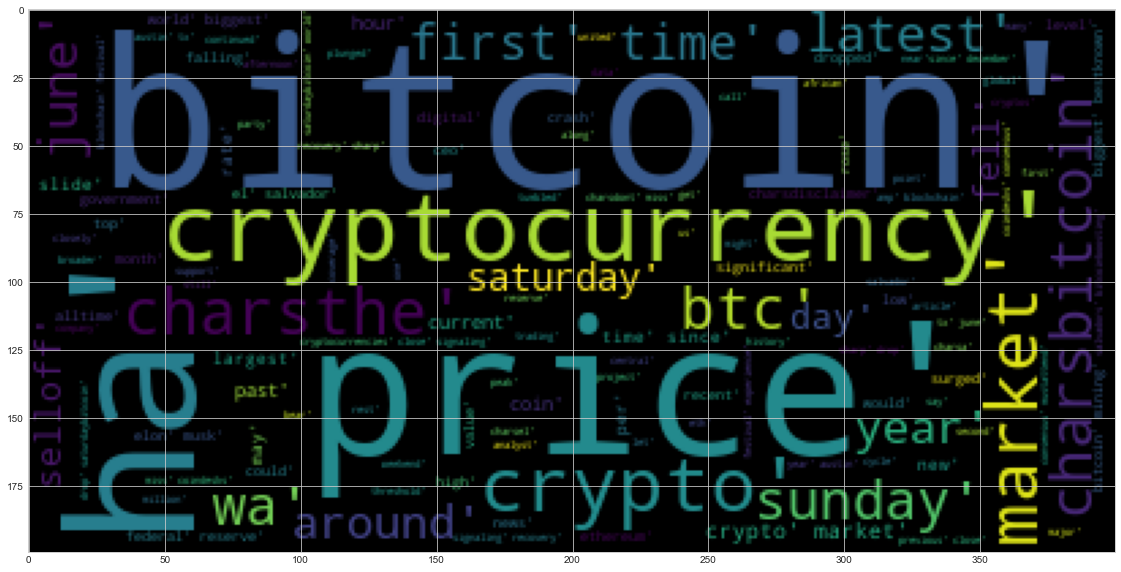

In [126]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(str(btc_tokens_df["b_cont_tokens"][3]))
plt.imshow(btc_wc)

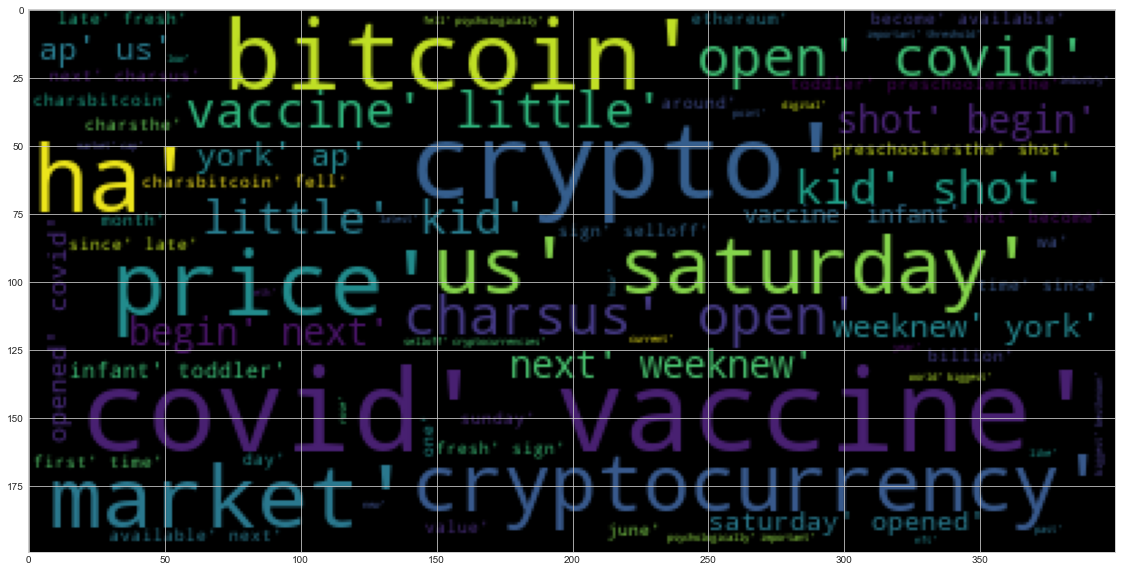

In [127]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(str(eth_tokens_df["e_cont_tokens"][3]))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [123]:
import spacy
from spacy import displacy

In [128]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-06-24 21:18:58.581495: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-24 21:18:58.581759: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [129]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
# All texts have been concatenated together

In [130]:
# Run the NER processor on all of the text
# Too many texts in the dataframe. For the sake of the exercise, only two of the articles will be extracted.
b_doc_1 = nlp(str(btc_tokens_df["b_cont_tokens"][0]))
b_doc_2 = nlp(str(btc_tokens_df["b_cont_tokens"][1]))
# Add a title to the document


In [131]:
# Render the visualization
displacy.render(b_doc_1, style='ent')

In [132]:
displacy.render(b_doc_2, style='ent')

In [133]:
# List all Entities
entities = [ent.text for ent in b_doc_1.ents if ent.label_ in ['GPE', 'DATE', 'PERSON', 'NORP', 'TIME', 'ORDINAL', 'ORG']]
print(entities)

['sam', 'wednesday', "'month'", 'london', 'wednesday', "'year'", 'wednesday', 'overnight', 'japan', 'wednesday', 'tuesday', 'taylor', 'wednesday', 'wednesday', 'tuesday', "'year'", 'first', "'year'", "'year'", 'morning', 'fourth', "'month'", 'first', "'quarter'", "'year'", 'morning', 'first', "'year'", 'wednesday', 'china', 'wednesday', 'morning', 'second', "'year'", 'wednesday', 'wednesday', "'year'", 'morning', 'first', "'year'", "'year'", 'morning', 'morning', 'first', "'month'", "'ago'", 'first', "'year'", 'wednesday', "'year'", "'year'", "'year'", "'hour'", "'month'", "'ago'", 'first', "'year'", 'wednesday', 'america', 'first', 'second', 'wednesday', 'first', "'month'", "'ago'", 'britain', 'california', 'wednesday', 'morning', 'tuesday', "'hour'", 'cnn', 'wednesday']


---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# All texts have been concatenated

In [134]:
# Run the NER processor on all of the text
e_doc_1 = nlp(str(eth_tokens_df["e_cont_tokens"][0]))
e_doc_2 = nlp(str(eth_tokens_df["e_cont_tokens"][1]))
# Add a title to the document
# YOUR CODE HERE!

In [135]:
# Render the visualization
displacy.render(e_doc_1, style='ent')

In [136]:
displacy.render(e_doc_2, style='ent')

In [137]:
# List all Entities
entities = [ent.text for ent in e_doc_1.ents if ent.label_ in ['GPE', 'DATE', 'PERSON', 'NORP', 'TIME', 'ORDINAL', 'ORG']]
print(entities)

['ebay', 'ebay', 'sam', "'year'", "'year'", 'tuesday', "'year'", 'second', 'britain', "'year'", 'yesterday', 'wednesday', 'thursday', 'first', 'morning', 'first', "'year'", "'six'", 'morning', "'year'", 'wednesday', "'year'", 'morning', 'first', 'third', 'first', 'first', "'year'", "'year'", 'wednesday', 'first', 'brazil', 'wednesday', 'morning', 'fiat', 'wednesday', 'arthur', 'australia', "'year'", 'wednesday', "'month'", 'wednesday', "'month'", 'fiat', 'genie', 'stanford', "'month'", "'month'", 'first']


---